In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kenneithUC/week-6-datamining/refs/heads/main/diabetes.csv')
df.head()

# Viewing 5 rows of the data.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()
#Dataset diabetes ini terdiri dari 768 baris dengan 9 kolom (7 kolom integer dan 2 kolom float) tanpa missing values, dimana kolom 'Outcome' sebagai target variable dengan label 0 (non-diabetes) dan 1 (diabetes).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()
#Dataset memiliki 768 sampel dengan nilai rata-rata tertinggi pada Glucose (120.89) dan Insulin (79.79), sementara nilai terendah pada DiabetesPedigreeFunction (0.078) dan nilai tertinggi pada Insulin (846), dengan distribusi Outcome menunjukkan sekitar 34.9% kasus diabetes.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.fillna({'Pregnancies':df['Pregnancies'].mean(),
           'Glucose':df['Glucose'].mean(),
           'BloodPressure':df['BloodPressure'].mean(),
           'SkinThickness':df['SkinThickness'].mean(),
           'Insulin':df['Insulin'].mean(),
           'BMI':df['BMI'].mean(),
           'DiabetesPedigreeFunction':df['DiabetesPedigreeFunction'].mean(),
           'Age':df['Age'].mean()
           },inplace=True)

df.isnull().sum()

# Filling the missing values with mean values, then checking whether there is still a null value in each column.

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


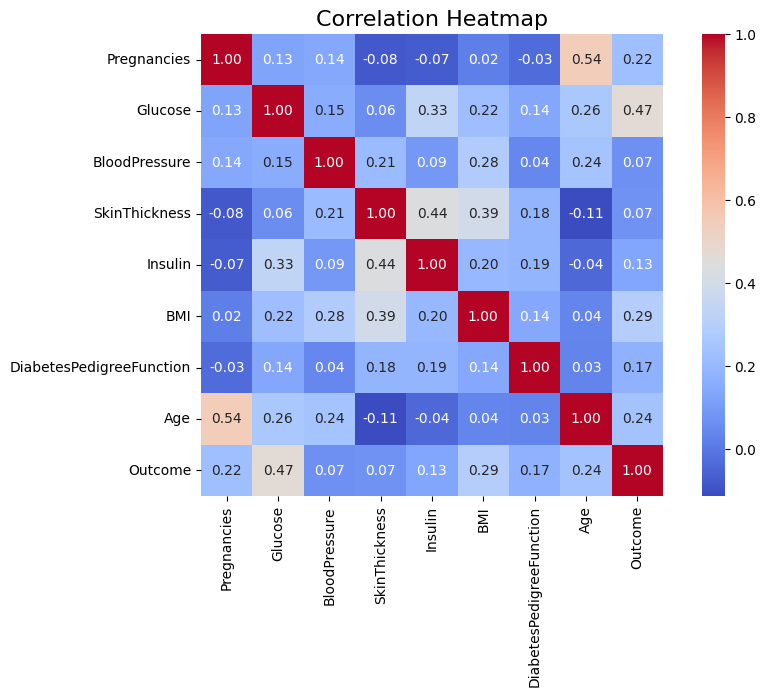

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()
#Berdasarkan heatmap korelasi, Glucose memiliki korelasi positif tertinggi dengan Outcome (0.47), diikuti oleh BMI (0.29) dan Age (0.24), menunjukkan bahwa tingkat glukosa adalah indikator terkuat untuk prediksi diabetes.

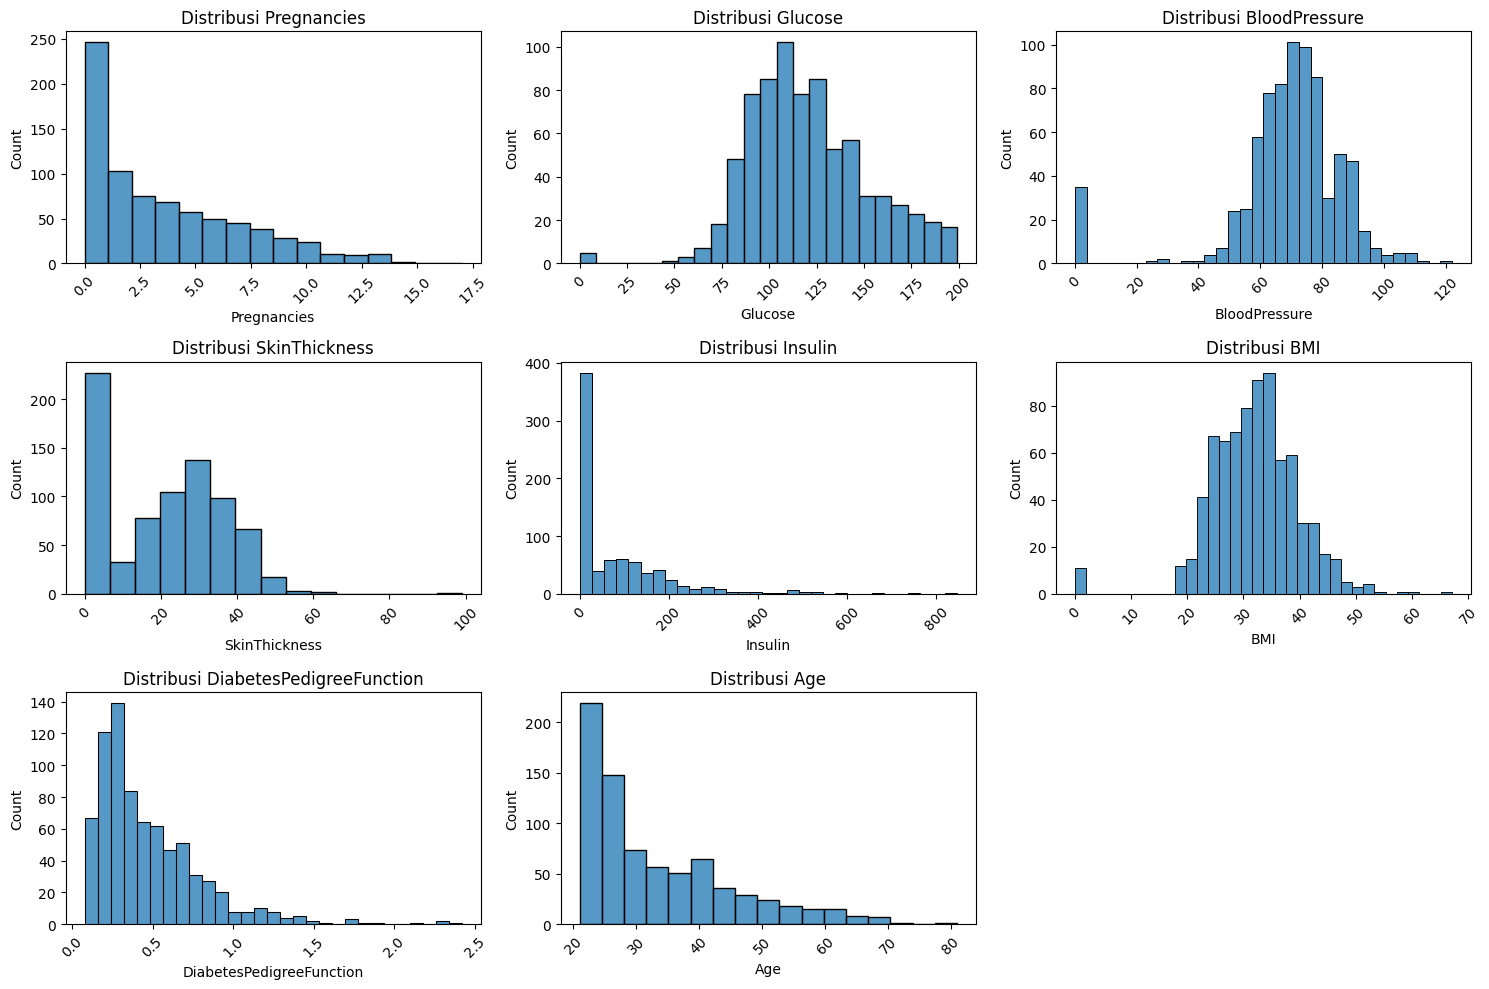

In [ ]:
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
            'BMI','DiabetesPedigreeFunction','Age','Outcome']
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=column, multiple="stack")
    plt.title(f'Distribusi {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#Distribusi data menunjukkan bahwa mayoritas pasien memiliki 0-2 kehamilan, kadar glukosa 75-150, tekanan darah 60-80, ketebalan kulit 20-40, insulin rendah (0-200), BMI 25-35, fungsi diabetes keturunan 0-0.5, dan berusia 20-40 tahun.

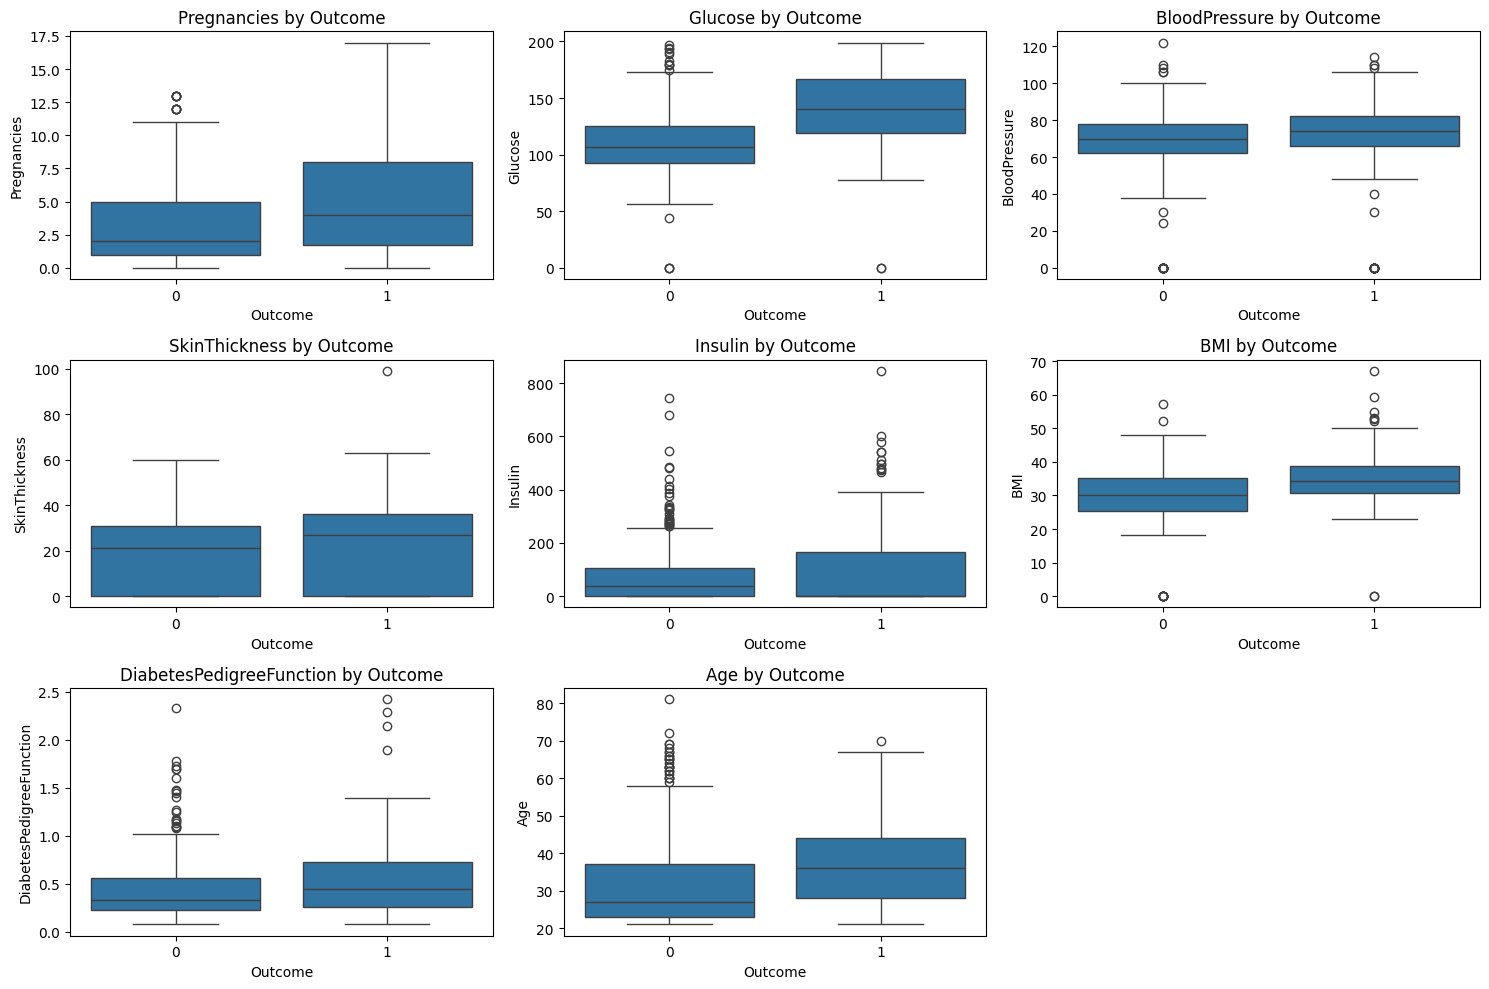

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, x='Outcome', y=column)
    plt.title(f'{column} by Outcome')
plt.tight_layout()
plt.show()
#Berdasarkan boxplot, pasien dengan diabetes (Outcome=1) cenderung memiliki nilai yang lebih tinggi pada hampir semua variabel, terutama pada Glucose, BMI, dan Age, serta memiliki lebih banyak outliers pada Insulin.

In [ ]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']
# X is the predicting variable, and y is the predicted variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Using train test split for data training and testing, with the test size of 20%

In [ ]:
X_train.shape, X_test.shape
# The shape method is used to check how many rows and columns are associated with each train or test data.

((614, 8), (154, 8))

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)
# Decision Tree Modelling using Criterion Entropy.

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

# Predicting the X_test using Criterion Entropy.

In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Showing the accuracy score based on the y_test and y_pred, and it results with a 76% percent accuracy.

Model accuracy score with criterion entropy: 0.7662


In [ ]:
y_train_en = clf_en.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_en)
training_accuracy = accuracy_score(y_train, y_train_en)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.7662
Training accuracy: 0.7752


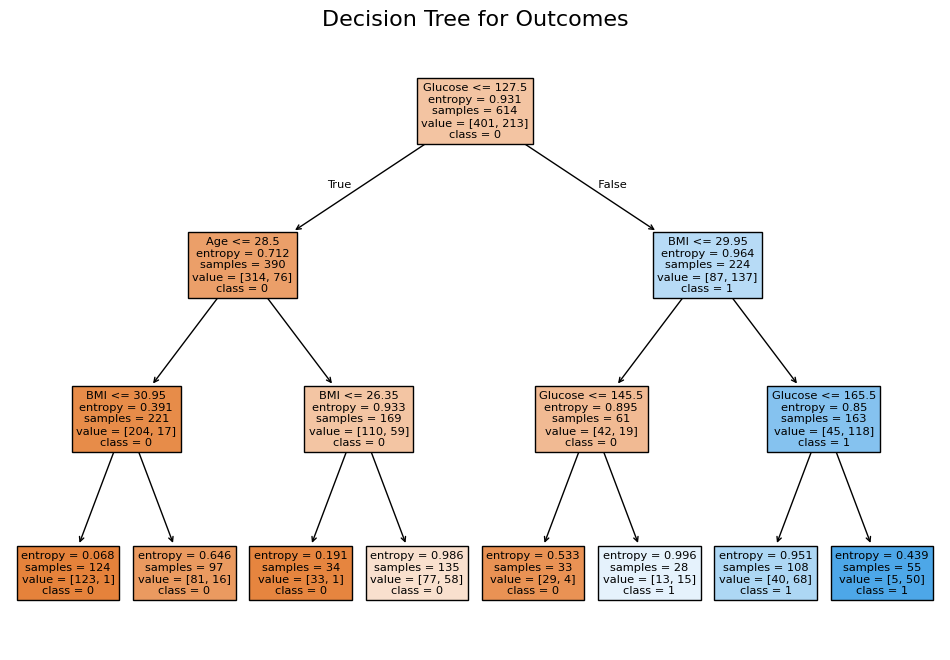

In [ ]:
from sklearn import tree

plt.figure(figsize=(12, 8))
tree.plot_tree(clf_en, feature_names=X.columns, class_names=['0','1'], filled=True)
plt.title('Decision Tree for Outcomes', fontsize=16)
plt.show()

# Using matplotlib to create the decision tree of the Criterion Entropy algorithm.

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

# Decision Tree Modelling using Criterion Gini.

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

# Predicting the X_test using Criterion Gini.

In [ ]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Showing the accuracy score based on the y_test and y_pred, and it results with a 75 percent accuracy

Model accuracy score with criterion gini: 0.7597


In [ ]:
y_train_gini = clf_gini.predict(X_train)

test_accuracy = accuracy_score(y_test, y_pred_gini)
training_accuracy = accuracy_score(y_train, y_train_gini)

print('Testing accuracy: {0:0.4f}'.format(test_accuracy))
print('Training accuracy: {0:0.4f}'.format(training_accuracy))

# Since the margin is only less than 5%, we can conclude that the model is well-fitted.

Testing accuracy: 0.7597
Training accuracy: 0.7769


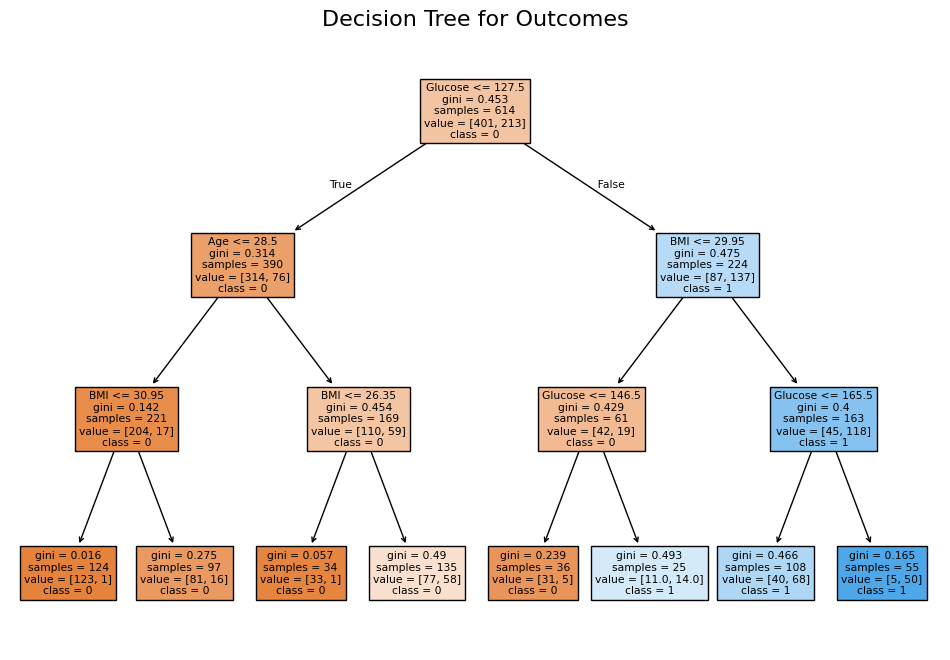

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(clf_gini, feature_names=X.columns, class_names=['0','1'], filled=True)
plt.title('Decision Tree for Outcomes', fontsize=16)
plt.show()


# Using matplotlib to create the decision tree of the Criterion Entropy algorithm.

In [ ]:
conf_matrix_en = confusion_matrix(y_test, y_pred_en)
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)

print("Confusion Matrix Entropy:\n", conf_matrix_en)
print("Confusion Matrix Gini Index:\n", conf_matrix_gini)

# Printing the confusion matrix of both Criterion Entropy and Criterion Gini.

Confusion Matrix Entropy:
 [[83 16]
 [20 35]]
Confusion Matrix Gini Index:
 [[83 16]
 [21 34]]


In [ ]:
class_report_en = classification_report(y_test, y_pred_en)
class_report_gini = classification_report(y_test, y_pred_gini)

print("Classification Report Entropy: \n", class_report_en)
print("Classification Report Gini Index: \n", class_report_gini)

# Printing the classification report both Criterion Entropy and Criterion Gini.

Classification Report Entropy: 
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Classification Report Gini Index: 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [ ]:
#h
#Berdasarkan hasil klasifikasi, model menunjukkan performa yang lebih baik dalam memprediksi kasus non-diabetes (class 0) dengan f1-score 0.82 dibandingkan kasus diabetes (class 0.66), dengan akurasi keseluruhan 0.77 untuk Entropy dan 0.76 untuk Gini Index, menunjukkan bahwa metode Entropy sedikit lebih baik untuk dataset ini.
#Kesimpulan: Model memiliki performa yang cukup baik secara keseluruhan tetapi perlu peningkatan dalam mendeteksi kasus diabetes (class 1) karena memiliki recall dan precision yang lebih rendah, yang penting mengingat ini adalah kasus medis.


In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Modelling using Naive Bayes Classifier.

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)

# Predicting the X_test using the Naive Bayes Classifier model.

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Model accuracy score: {accuracy_nb:.4f}")

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix:\n", conf_matrix_nb)

# Printing both accuracy score and confusion matrix of the Naive Bayes Classifier model, showing a 76% accuracy.

Model accuracy score: 0.7662
Confusion Matrix:
 [[79 20]
 [16 39]]


In [ ]:
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report:\n", class_report_nb)

# Classification report of the Naive Bayes Classifier, showing the precision, recall, f1-score, and support values of the model.

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

